## Setup and Data Preprocessing

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset and parse the 'transactiondate' column as dates
raw_train_data =pd.read_csv("./train_2016_v2.csv",parse_dates=["transactiondate"])
raw_train_data.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [3]:
# Import additional dataset related to properties
house_data = pd.read_csv("./properties_2016.csv")
house_data.head()

/work/cse478/shared/envs/hw/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (22,32,34,49,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [4]:
def get_unique(name,data_series):
    """
    Function to print information about unique values in a given data series.

    Parameters:
    - name: A string representing the name or description of the data series.
    - data_series: The Pandas Series for which unique values are analyzed.

    Output:
    - Prints the total number of records and the number of unique records in the data series.
    """
    print("{} has total {} records and {} are unique.".format(name,len(data_series),len(data_series.unique())))

In [5]:
get_unique("raw_train_data",raw_train_data["parcelid"])

raw_train_data has total 90275 records and 90150 are unique.


In [6]:
get_unique("house_data",house_data["parcelid"])

house_data has total 2985217 records and 2985217 are unique.


In [7]:
# Identify and display duplicate rows based on the "parcelid" column
duplicateRowsDF = raw_train_data[raw_train_data.duplicated(["parcelid"],keep=False)]
print("All Duplicate Rows based on all columns are :")
pd.DataFrame(duplicateRowsDF.head(10))

All Duplicate Rows based on all columns are :


,parcelid,logerror,transactiondate
496,13850164,-0.1567,2016-01-05
497,13850164,-0.0460,2016-06-29
781,14677191,-0.3682,2016-01-06
782,14677191,-0.0845,2016-09-12
813,11005771,-0.0131,2016-01-06
814,11005771,0.0545,2016-06-17
967,11183209,-0.0481,2016-01-07
968,11183209,-0.0070,2016-09-14
1164,11554091,-0.1696,2016-01-07
1165,11554091,-0.0954,2016-07-05


In [8]:
# Count the occurrences of each unique value in the "parcelid" column within the identified duplicate rows
duplicateRowsDF["parcelid"].value_counts()

11842707    3
13850164    2
11105038    2
11602482    2
12613442    2
           ..
11633771    2
17151530    2
10911172    2
14678446    2
14367791    2
Name: parcelid, Length: 124, dtype: int64

In [9]:
# Locate and display rows in duplicateRowsDF where "parcelid" is equal to 11842707
duplicateRowsDF.loc[duplicateRowsDF["parcelid"]==11842707]

,parcelid,logerror,transactiondate
55794,11842707,-0.0284,2016-07-14
55795,11842707,0.0573,2016-08-22
55796,11842707,0.2078,2016-09-29


In [10]:
# Create a new DataFrame with unique rows based on "parcelid," keeping the last occurrence in case of duplicates
unique_train_data = raw_train_data.sort_values("transactiondate").drop_duplicates("parcelid",keep = "last")

In [11]:
get_unique("unique_train_data",unique_train_data["parcelid"])

unique_train_data has total 90150 records and 90150 are unique.


In [12]:
# Create a new DataFrame to merge the house_data and unique_train_data DataFrames on the "parcelid" column, using a left join
full_data = pd.DataFrame()
full_data = pd.merge(house_data,unique_train_data,on="parcelid",how="left")

In [13]:
get_unique("full_data",full_data["parcelid"])

full_data has total 2985217 records and 2985217 are unique.


In [14]:
# Count the total number of occurrences of logerror in the full_data DataFrame
full_data["logerror"].value_counts().sum()

90150

In [15]:
# Filter rows in full_data where logerror is not NaN, creating the train_data DataFrame
train_data = full_data[full_data["logerror"].notna()]
len(train_data)

90150

In [16]:
def drop_columns(data_series):
    """
    Function to identify and return a list of columns with missing values exceeding 30%.

    Parameters:
    - data_series: The Pandas Series or DataFrame for which missing values are analyzed.

    Returns:
    - drop_columns_list: A list of column names with missing values exceeding 30%.
    """
    # Create a DataFrame with the percentage of missing values for each column
    missing_value_df = pd.DataFrame((data_series.isnull().sum()/len(data_series))*100,columns=["missing_value"])
    
    # Identify columns with missing values exceeding 30%
    drop_columns_list = missing_value_df.loc[missing_value_df["missing_value"]>30].index.to_list()
    
    return drop_columns_list

drp_col = drop_columns(train_data)
drp_col

['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'decktypeid',
 'finishedfloor1squarefeet',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertyzoningdesc',
 'regionidneighborhood',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'numberofstories',
 'fireplaceflag',
 'taxdelinquencyflag',
 'taxdelinquencyyear']

In [17]:
# Drop columns with missing values exceeding 30% from the train_data DataFrame
train_data.drop(columns=drp_col,inplace = True)

/work/cse478/shared/envs/hw/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
# Display the data types of each column in the train_data DataFrame
(train_data.isnull().sum()/len(train_data))*100

parcelid                         0.000000
bathroomcnt                      0.000000
bedroomcnt                       0.000000
calculatedbathnbr                1.304493
calculatedfinishedsquarefeet     0.729895
finishedsquarefeet12             5.174709
fips                             0.000000
fullbathcnt                      1.304493
latitude                         0.000000
longitude                        0.000000
lotsizesquarefeet               11.243483
propertycountylandusecode        0.001109
propertylandusetypeid            0.000000
rawcensustractandblock           0.000000
regionidcity                     1.997781
regionidcounty                   0.000000
regionidzip                      0.038824
roomcnt                          0.000000
yearbuilt                        0.835275
structuretaxvaluedollarcnt       0.419301
taxvaluedollarcnt                0.001109
assessmentyear                   0.000000
landtaxvaluedollarcnt            0.001109
taxamount                        0

In [19]:
# Display the data types of each column in the train_data DataFrame
train_data.dtypes

parcelid                                 int64
bathroomcnt                            float64
bedroomcnt                             float64
calculatedbathnbr                      float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
fips                                   float64
fullbathcnt                            float64
latitude                               float64
longitude                              float64
lotsizesquarefeet                      float64
propertycountylandusecode               object
propertylandusetypeid                  float64
rawcensustractandblock                 float64
regionidcity                           float64
regionidcounty                         float64
regionidzip                            float64
roomcnt                                float64
yearbuilt                              float64
structuretaxvaluedollarcnt             float64
taxvaluedollarcnt                      float64
assessmentyea

In [20]:
# Drop the "transactiondate" column from the train_data DataFrame
train_data.drop(columns=["transactiondate"],inplace=True)

In [21]:
# Set the "parcelid" column as the index of the train_data DataFrame
train_data.set_index('parcelid',inplace= True)

In [22]:
train_data.head()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
parcelid,,,,,,,,,,,,,,,,,,,,,
17073783,2.5,3.0,2.5,1264.0,1264.0,6111.0,2.0,34303597.0,-119287236.0,1735.0,...,97081.0,5.0,1986.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953
17088994,1.0,2.0,1.0,777.0,777.0,6111.0,1.0,34272866.0,-119198911.0,NaN,...,97083.0,4.0,1990.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198
17100444,2.0,3.0,2.0,1101.0,1101.0,6111.0,2.0,34340801.0,-119079610.0,6569.0,...,97113.0,5.0,1956.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060
17102429,1.5,2.0,1.5,1554.0,1554.0,6111.0,1.0,34354313.0,-119076405.0,7400.0,...,97113.0,5.0,1965.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566
17109604,2.5,4.0,2.5,2415.0,2415.0,6111.0,2.0,34266578.0,-119165392.0,6326.0,...,97084.0,8.0,1984.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573


In [23]:
# Separate features (X) and target variable (y) from the train_data DataFrame
X = train_data.drop(columns = ['logerror'],inplace=False)
y = pd.DataFrame(train_data['logerror'])

# Split the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
# Convert all columns in X_train to numeric, coercing errors to NaN
X_train[X_train.columns] = X_train[X_train.columns].apply(pd.to_numeric, errors='coerce')

/work/cse478/shared/envs/hw/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [25]:
# Fill missing values in X_train with the median of each column
X_train = X_train.fillna(X_train.median())

# Convert all columns in X_test to numeric, coercing errors to NaN
X_test[X_test.columns] = X_test[X_test.columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values in X_test with the median of each column
X_test = X_test.fillna(X_test.median())

## Linear Regression 

In [26]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model and fit it to the training data
reg = LinearRegression().fit(X_train, y_train)

# Make predictions on the test data
y_pred = reg.predict(X_test)

In [27]:
from sklearn import metrics

# Calculate and print the mean absolute error between the actual and predicted values
mae_lin = metrics.mean_absolute_error(y_test, y_pred)
print("Linear Regression Mean Absolute Error:", mae_lin)

Linear Regression Mean Absolute Error: 0.06807909159037989


## XGBoost 

In [28]:
import xgboost as xgb

In [29]:
# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [30]:
# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'max_depth': 6,  # Adjust the depth as needed
    'eta': 0.1,       # Learning rate
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

In [31]:
# Train the XGBoost model
num_round = 100  # Adjust the number of boosting rounds as needed
model = xgb.train(params, dtrain, num_round)

In [32]:
# Make predictions on the test set
y_pred_xgb = model.predict(dtest)

In [33]:
# Evaluate the performance of the XGBoost model
mae_xgb = metrics.mean_absolute_error(y_test, y_pred_xgb)
print("XGBoost Mean Absolute Error:", mae_xgb)

XGBoost Mean Absolute Error: 0.06889196251775133


## Comparison of Results

In [34]:
import matplotlib.pyplot as plt
from scipy import stats

In [35]:
### Visualizations (Scatter plot)

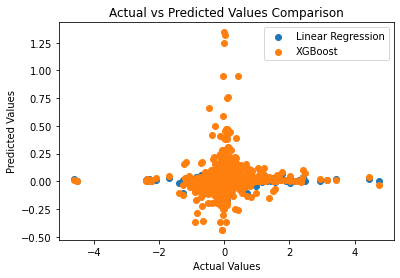

In [36]:
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, y_pred_xgb, label='XGBoost')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Actual vs Predicted Values Comparison')
plt.show()

In [37]:
### Statistical Test (Paired t-test)

In [38]:
_, p_value = stats.ttest_rel(y_test.values.flatten(), y_pred_xgb)
print("Paired t-test p-value:", p_value)

Paired t-test p-value: 0.12613318354706882


In [39]:
### Feature Importance from the XGBoost model

In [40]:
feature_importance = model.get_fscore()
print("XGBoost Feature Importance:", feature_importance)

XGBoost Feature Importance: {'structuretaxvaluedollarcnt': 264, 'bathroomcnt': 194, 'finishedsquarefeet12': 117, 'taxamount': 253, 'taxvaluedollarcnt': 166, 'rawcensustractandblock': 92, 'latitude': 268, 'longitude': 236, 'propertycountylandusecode': 86, 'calculatedfinishedsquarefeet': 323, 'roomcnt': 32, 'regionidzip': 114, 'landtaxvaluedollarcnt': 183, 'bedroomcnt': 143, 'yearbuilt': 168, 'regionidcity': 73, 'lotsizesquarefeet': 286, 'censustractandblock': 63, 'propertylandusetypeid': 27, 'calculatedbathnbr': 33, 'fips': 13, 'fullbathcnt': 5}


In [41]:
### Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score, KFold

In [43]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "XGBoost": xgb.XGBRegressor(
        objective="reg:squarederror",
        eval_metric="mae",
        max_depth=6,
        eta=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        seed=42,
    )
}

In [44]:
# Perform K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {model_name: [] for model_name in models}

In [45]:
for model_name, model in models.items():
    for train_index, val_index in kf.split(X_train):
        # Train the model
        model.fit(X_train.iloc[train_index], y_train.iloc[train_index])

        # Make predictions on the validation set
        y_pred = model.predict(X_train.iloc[val_index])

        # Calculate and store mean absolute error
        score = metrics.mean_absolute_error(y_train.iloc[val_index], y_pred)
        results[model_name].append(score)

/work/cse478/shared/envs/hw/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/work/cse478/shared/envs/hw/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/work/cse478/shared/envs/hw/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/work/cse478/shared/envs/hw/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/work/cse478/shared/envs/hw/lib/python3.8/site-packages/xgbo

In [46]:
# Print average mean absolute error for each model
for model_name, scores in results.items():
    mean_score = np.mean(scores)
    print(f"\nModel: {model_name}")
    print(f"Mean Absolute Error: {mean_score}")


Model: Linear Regression
Mean Absolute Error: 0.0686558838091091

Model: XGBoost
Mean Absolute Error: 0.06967672013784199
